# Tutorial 9: Inference Optimization

![Status](https://img.shields.io/static/v1.svg?label=Status&message=Finished&color=green)

**Filled notebook:**
[![View filled on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch9-2024Fall_inferenceoptimization.ipynb)
[![Open filled In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lkk688/DeepDataMiningLearning/blob/master/docs/notebooks/CMPE-pytorch9-2024Fall_inferenceoptimization.ipynb)       
**Author:** Kaikai Liu

## Install Pytorch

Pytorch is already installed in Colab. If you are installing the pytorch in your local machine, follow the tutorials here: from https://pytorch.org/get-started/locally/. You can check our pytorch installation tutorials for Mac/Windows/Linux/HPC here: https://deepdatamininglearning.readthedocs.io/

Click "Connect" to connect to a Colab VM instance. In Runtime->Change Runtime type to select CPU/TPU/GPU.

In [ ]:
!nvidia-smi

Mon Aug 26 19:58:23 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA TITAN V                 Off | 00000000:01:00.0  On |                  N/A |
| 33%   49C    P2              41W / 250W |   1309MiB / 12288MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip3 install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.8 MB/s eta 0:00:00


If the installed version of PyTorch is lower than required, uninstall it and reinstall again by running the following commands:

!pip3 uninstall --yes torch torchaudio torchvision torchtext torchdata
!pip3 install torch torchaudio torchvision torchtext torchdata

In [ ]:
import timm

In [ ]:
!pwd

/content


In [ ]:
!ls /

bin	 cuda-keyring_1.0-1_all.deb  dev   lib	  libx32  NGC-DL-CONTAINER-LICENSE  root  srv  tools
boot	 datalab		     etc   lib32  media   opt			    run   sys  usr
content  Dataset		     home  lib64  mnt	  proc			    sbin  tmp  var


## Check PyTorch Environment

Pytorch is very similar to the `numpy` package. Let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

Start a local colab container: `docker run --gpus=all -p 127.0.0.1:9000:8080 us-docker.pkg.dev/colab-images/public/runtime`, copy the link output from the terminal. In Colab, select connect to local runtime and paste the link: http://127.0.0.1:9000/?token=cf72df5a62ed764fd3bce315a542cade27d7984365045cc2

In [ ]:
!python -V

Python 3.10.12


In [ ]:
!nvidia-smi #check GPU

Mon Aug 26 19:34:12 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA TITAN V                 Off | 00000000:01:00.0  On |                  N/A |
| 32%   46C    P8              28W / 250W |   1470MiB / 12288MiB |      9%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch
print("Using torch", torch.__version__)

Using torch 2.3.0+cu121


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4722, 0.1678, 0.9813],
        [0.6751, 0.5239, 0.5018],
        [0.0766, 0.7491, 0.2419],
        [0.8492, 0.8048, 0.9454],
        [0.8544, 0.7565, 0.1705]])


In [ ]:
import torchvision
print(torchvision.__version__)

0.18.0+cu121


In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')  # CUDA GPU
elif torch.backends.mps.is_available():
    device = torch.device('mps') #Apple GPU
else:
    device = torch.device("cpu")

In [ ]:
print('Using device:', device)
#Additional Info when using cuda
if device.type == 'cuda':
    print("Device name: ", torch.cuda.get_device_name(0))
    print("Device properties:", torch.cuda.get_device_properties(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda
Device name:  NVIDIA TITAN V
Device properties: _CudaDeviceProperties(name='NVIDIA TITAN V', major=7, minor=0, total_memory=12023MB, multi_processor_count=80)
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [ ]:
torch.cuda.device_count()

1

In [ ]:
torch.version.cuda

'12.1'

In [ ]:
!nvcc -V

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [ ]:
torch.backends.cudnn.version()

8906

In [ ]:
!echo $LD_LIBRARY_PATH

/usr/local/nvidia/lib:/usr/local/nvidia/lib64


As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. However, a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below.

In [ ]:
torch.manual_seed(42) # Setting the seed

## Load Google Drive Folder for Colab

In Colab, add the following to load google drive folder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
import os
filename = os.path.join("/content/gdrive/My Drive/data", filename)

Check the following tutorial regarding the external data for Colab: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=XDg9OBaYqRMd

## Model Export

### Exporting to TorchScript

TorchScript is a way to create serializable and optimizable models from PyTorch code; any TorchScript program can be saved from a Python process and loaded in a process where there is no Python dependency.

We can convert a model to TorchScript in two different ways:

- *Tracing*: runs the code, records the operations that happen and constructs a ScriptModule containing those operations. Control flow, or dynamic behaviour such as if/else statements are erased.
- *Scripting*: uses a script compiler to perform a direct analysis of your Python source code to transform it into TorchScript. This preserves dynamic control flow and is valid for inputs of different sizes.

*   [TorchScript docs](https://pytorch.org/docs/stable/jit.html)
*   [TorchScirpt tutorial](https://pytorch.org/tutorials/beginner/Intro_to_TorchScript_tutorial.html)




A Module is the basic unit of composition in PyTorch, it contains:
*   A constructor, which prepares the module for invocation
*   A set of Parameters and sub-Modules. These are initialized by the constructor and can be used by the module during invocation.
*   A forward function. This is the code that is run when the module is invoked.







#### Tracing Modules

In [ ]:
import torch
class MyCell(torch.nn.Module):
    def __init__(self):
        super(MyCell, self).__init__()
        self.linear = torch.nn.Linear(4, 4)

    def forward(self, x, h):
        new_h = torch.tanh(self.linear(x) + h)
        return new_h, new_h

my_cell = MyCell()
x, h = torch.rand(3, 4), torch.rand(3, 4)
traced_cell = torch.jit.trace(my_cell, (x, h))
print(traced_cell)

MyCell(
  original_name=MyCell
  (linear): Linear(original_name=Linear)
)


In [ ]:
my_cell(x, h)

(tensor([[0.7988, 0.5151, 0.4948, 0.0235],
         [0.4907, 0.2618, 0.6857, 0.5189],
         [0.4836, 0.7787, 0.2763, 0.7465]], grad_fn=<TanhBackward0>),
 tensor([[0.7988, 0.5151, 0.4948, 0.0235],
         [0.4907, 0.2618, 0.6857, 0.5189],
         [0.4836, 0.7787, 0.2763, 0.7465]], grad_fn=<TanhBackward0>))

We can see that invoking traced_cell produces the same results as the Python module:

In [ ]:
traced_cell(x, h)

(tensor([[0.7988, 0.5151, 0.4948, 0.0235],
         [0.4907, 0.2618, 0.6857, 0.5189],
         [0.4836, 0.7787, 0.2763, 0.7465]], grad_fn=<TanhBackward0>),
 tensor([[0.7988, 0.5151, 0.4948, 0.0235],
         [0.4907, 0.2618, 0.6857, 0.5189],
         [0.4836, 0.7787, 0.2763, 0.7465]], grad_fn=<TanhBackward0>))

We’ve instantiated it, but this time, we’ve called torch.jit.trace, passed in the Module, and passed in example inputs the network might see.

In [ ]:
print(traced_cell.graph)

graph(%self.1 : __torch__.MyCell,
      %x : Float(3, 4, strides=[4, 1], requires_grad=0, device=cpu),
      %h : Float(3, 4, strides=[4, 1], requires_grad=0, device=cpu)):
  %linear : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="linear"](%self.1)
  %20 : Tensor = prim::CallMethod[name="forward"](%linear, %x)
  %11 : int = prim::Constant[value=1]() # <ipython-input-1-e5adf63368c4>:8:0
  %12 : Float(3, 4, strides=[4, 1], requires_grad=1, device=cpu) = aten::add(%20, %h, %11) # <ipython-input-1-e5adf63368c4>:8:0
  %13 : Float(3, 4, strides=[4, 1], requires_grad=1, device=cpu) = aten::tanh(%12) # <ipython-input-1-e5adf63368c4>:8:0
  %14 : (Float(3, 4, strides=[4, 1], requires_grad=1, device=cpu), Float(3, 4, strides=[4, 1], requires_grad=1, device=cpu)) = prim::TupleConstruct(%13, %13)
  return (%14)



However, this is a very low-level representation and most of the information contained in the graph is not useful for end users. Instead, we can use the .code property to give a Python-syntax interpretation of the code:

In [ ]:
print(traced_cell.code)

def forward(self,
    x: Tensor,
    h: Tensor) -> Tuple[Tensor, Tensor]:
  linear = self.linear
  _0 = torch.tanh(torch.add((linear).forward(x, ), h))
  return (_0, _0)



In [ ]:
traced_cell.save('traced_cell.pt')

loaded = torch.jit.load('traced_cell.pt')

print(loaded)
print(loaded.code)

RecursiveScriptModule(
  original_name=MyCell
  (linear): RecursiveScriptModule(original_name=Linear)
)
def forward(self,
    x: Tensor,
    h: Tensor) -> Tuple[Tensor, Tensor]:
  linear = self.linear
  _0 = torch.tanh(torch.add((linear).forward(x, ), h))
  return (_0, _0)



In [ ]:
loaded(x, h)

(tensor([[0.7988, 0.5151, 0.4948, 0.0235],
         [0.4907, 0.2618, 0.6857, 0.5189],
         [0.4836, 0.7787, 0.2763, 0.7465]], grad_fn=<TanhBackward0>),
 tensor([[0.7988, 0.5151, 0.4948, 0.0235],
         [0.4907, 0.2618, 0.6857, 0.5189],
         [0.4836, 0.7787, 0.2763, 0.7465]], grad_fn=<TanhBackward0>))

In [ ]:
import torch
import torchvision

# An instance of your model.
model = torchvision.models.resnet18()

# An example input you would normally provide to your model's forward() method.
example = torch.rand(1, 3, 224, 224)

# Use torch.jit.trace to generate a torch.jit.ScriptModule via tracing.
traced_script_module = torch.jit.trace(model, example)

/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
output = traced_script_module(torch.ones(1, 3, 224, 224))
output.shape

torch.Size([1, 1000])

In [ ]:
output[0, :5]

tensor([-0.0130, -0.1359, -0.2638, -0.0804, -0.3967], grad_fn=<SliceBackward0>)

In [ ]:
traced_script_module.save("traced_resnet_model.pt")

#### Scripting

In [ ]:
class MyDecisionGate(torch.nn.Module):
    def forward(self, x):
        if x.sum() > 0:
            return x
        else:
            return -x

class MyCell(torch.nn.Module):
    def __init__(self, dg):
        super(MyCell, self).__init__()
        self.dg = dg
        self.linear = torch.nn.Linear(4, 4)

    def forward(self, x, h):
        new_h = torch.tanh(self.dg(self.linear(x)) + h)
        return new_h, new_h

my_cell = MyCell(MyDecisionGate())
traced_cell = torch.jit.trace(my_cell, (x, h))

print(traced_cell.dg.code)
print(traced_cell.code)

def forward(self,
    argument_1: Tensor) -> Tensor:
  return torch.neg(argument_1)

def forward(self,
    x: Tensor,
    h: Tensor) -> Tuple[Tensor, Tensor]:
  dg = self.dg
  linear = self.linear
  _0 = torch.add((dg).forward((linear).forward(x, ), ), h)
  _1 = torch.tanh(_0)
  return (_1, _1)



<ipython-input-11-443dc4c96c45>:3: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if x.sum() > 0:


Looking at the .code output, we can see that the if-else branch is nowhere to be found! Why? Tracing does exactly what we said it would: run the code, record the operations that happen and construct a ScriptModule that does exactly that. Unfortunately, things like control flow are erased.

How can we faithfully represent this module in TorchScript? We provide a script compiler, which does direct analysis of your Python source code to transform it into TorchScript. Let’s convert MyDecisionGate using the script compiler:

In [ ]:
scripted_gate = torch.jit.script(MyDecisionGate())

my_cell = MyCell(scripted_gate)
scripted_cell = torch.jit.script(my_cell)

print(scripted_gate.code)
print(scripted_cell.code)

def forward(self,
    x: Tensor) -> Tensor:
  if bool(torch.gt(torch.sum(x), 0)):
    _0 = x
  else:
    _0 = torch.neg(x)
  return _0

def forward(self,
    x: Tensor,
    h: Tensor) -> Tuple[Tensor, Tensor]:
  dg = self.dg
  linear = self.linear
  _0 = torch.add((dg).forward((linear).forward(x, ), ), h)
  new_h = torch.tanh(_0)
  return (new_h, new_h)



In [ ]:
# New inputs
x, h = torch.rand(3, 4), torch.rand(3, 4)
print(scripted_cell(x, h))

(tensor([[ 0.5862,  0.8320,  0.1424,  0.9406],
        [ 0.4728,  0.7435, -0.3474,  0.8459],
        [ 0.7561,  0.8780, -0.1728,  0.5240]], grad_fn=<TanhBackward0>), tensor([[ 0.5862,  0.8320,  0.1424,  0.9406],
        [ 0.4728,  0.7435, -0.3474,  0.8459],
        [ 0.7561,  0.8780, -0.1728,  0.5240]], grad_fn=<TanhBackward0>))


#### Mixing Scripting and Tracing

Some situations call for using tracing rather than scripting (e.g. a module has many architectural decisions that are made based on constant Python values that we would like to not appear in TorchScript). In this case, scripting can be composed with tracing: torch.jit.script will inline the code for a traced module, and tracing will inline the code for a scripted module.

In [ ]:
class MyRNNLoop(torch.nn.Module):
    def __init__(self):
        super(MyRNNLoop, self).__init__()
        self.cell = torch.jit.trace(MyCell(scripted_gate), (x, h))

    def forward(self, xs):
        h, y = torch.zeros(3, 4), torch.zeros(3, 4)
        for i in range(xs.size(0)):
            y, h = self.cell(xs[i], h)
        return y, h

rnn_loop = torch.jit.script(MyRNNLoop())
print(rnn_loop.code)

def forward(self,
    xs: Tensor) -> Tuple[Tensor, Tensor]:
  h = torch.zeros([3, 4])
  y = torch.zeros([3, 4])
  y0 = y
  h0 = h
  for i in range(torch.size(xs, 0)):
    cell = self.cell
    _0 = (cell).forward(torch.select(xs, 0, i), h0, )
    y1, h1, = _0
    y0, h0 = y1, h1
  return (y0, h0)



In [ ]:
class WrapRNN(torch.nn.Module):
    def __init__(self):
        super(WrapRNN, self).__init__()
        self.loop = torch.jit.script(MyRNNLoop())

    def forward(self, xs):
        y, h = self.loop(xs)
        return torch.relu(y)

traced = torch.jit.trace(WrapRNN(), (torch.rand(10, 3, 4)))
print(traced.code)

def forward(self,
    xs: Tensor) -> Tensor:
  loop = self.loop
  _0, y, = (loop).forward(xs, )
  return torch.relu(y)



### libtorch Install

https://pytorch.org/cppdocs/installing.html

In [ ]:
%%bash
wget https://download.pytorch.org/libtorch/nightly/cpu/libtorch-shared-with-deps-latest.zip
unzip libtorch-shared-with-deps-latest.zip

Archive:  libtorch-shared-with-deps-latest.zip
   creating: libtorch/
   creating: libtorch/lib/
  inflating: libtorch/lib/libaoti_custom_ops.so  
  inflating: libtorch/lib/libasmjit.a  
  inflating: libtorch/lib/libbackend_with_compiler.so  
  inflating: libtorch/lib/libbenchmark.a  
  inflating: libtorch/lib/libbenchmark_main.a  
  inflating: libtorch/lib/libc10.so  
  inflating: libtorch/lib/libclog.a  
  inflating: libtorch/lib/libcpuinfo.a  
  inflating: libtorch/lib/libcpuinfo_internals.a  
  inflating: libtorch/lib/libdnnl.a  
  inflating: libtorch/lib/libfbgemm.a  
  inflating: libtorch/lib/libfmt.a   
  inflating: libtorch/lib/libgloo.a  
  inflating: libtorch/lib/libgmock.a  
  inflating: libtorch/lib/libgmock_main.a  
  inflating: libtorch/lib/libgtest.a  
  inflating: libtorch/lib/libgtest_main.a  
  inflating: libtorch/lib/libittnotify.a  
  inflating: libtorch/lib/libjitbackend_test.so  
  inflating: libtorch/lib/libkineto.a  
  inflating: libtorch/lib/libnnapi_backend.so

--2024-08-20 06:07:39--  https://download.pytorch.org/libtorch/nightly/cpu/libtorch-shared-with-deps-latest.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.227.74.43, 13.227.74.25, 13.227.74.24, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.227.74.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167083828 (159M) [application/zip]
Saving to: ‘libtorch-shared-with-deps-latest.zip’

     0K .......... .......... .......... .......... ..........  0% 1.16M 2m17s
    50K .......... .......... .......... .......... ..........  0%  736K 2m59s
   100K .......... .......... .......... .......... ..........  0%  913K 2m59s
   150K .......... .......... .......... .......... ..........  0% 25.9M 2m16s
   200K .......... .......... .......... .......... ..........  0% 14.9M 1m51s
   250K .......... .......... .......... .......... ..........  0% 16.1M 94s
   300K .......... .......... .......... .......... ..........  0%  924K 1m46s
   

In [ ]:
!ls libtorch

bin  build-hash  build-version	include  lib  share


#### libtorch C++ inference

In [ ]:
%%file CMakeLists.txt
cmake_minimum_required(VERSION 3.18 FATAL_ERROR)
project(example-app)

find_package(Torch REQUIRED)
set(CMAKE_CXX_FLAGS "${CMAKE_CXX_FLAGS} ${TORCH_CXX_FLAGS}")

add_executable(example-app example-app.cpp)
target_link_libraries(example-app "${TORCH_LIBRARIES}")
set_property(TARGET example-app PROPERTY CXX_STANDARD 17)

# The following code block is suggested to be used on Windows.
# According to https://github.com/pytorch/pytorch/issues/25457,
# the DLLs need to be copied to avoid memory errors.
if (MSVC)
  file(GLOB TORCH_DLLS "${TORCH_INSTALL_PREFIX}/lib/*.dll")
  add_custom_command(TARGET example-app
                     POST_BUILD
                     COMMAND ${CMAKE_COMMAND} -E copy_if_different
                     ${TORCH_DLLS}
                     $<TARGET_FILE_DIR:example-app>)
endif (MSVC)

Writing CMakeLists.txt


In [ ]:
%%file example-app.cpp
#include <torch/torch.h>
#include <iostream>

int main() {
  torch::Tensor tensor = torch::rand({2, 3});
  std::cout << tensor << std::endl;
}

Writing example-app.cpp


In [ ]:
!pwd

/content


In [ ]:
%%bash
mkdir build
cd build
cmake -DCMAKE_PREFIX_PATH=/content/libtorch ..
cmake --build . --config Release

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Torch: /content/libtorch/lib/libtorch.so  
-- Configuring done (0.5s)
-- Generating done (0.0s)
-- Build files have been written to: /content/build
[ 50%] Building CXX object CMakeFiles/example-app.dir/example-app.cpp.o
[100%] Linking CXX executable example-app
[100%] Built target example-app


In [ ]:
!cd build && ./example-app

 0.0757  0.9887  0.4048
 0.6494  0.2148  0.2091
[ CPUFloatType{2,3} ]


Ref: https://pytorch.org/tutorials/advanced/cpp_export.html

In [ ]:
%%file example-app.cpp
#include <torch/script.h> // One-stop header.

#include <iostream>
#include <memory>

int main(int argc, const char* argv[]) {
  if (argc != 2) {
    std::cerr << "usage: example-app <path-to-exported-script-module>\n";
    return -1;
  }


  torch::jit::script::Module module;
  try {
    // Deserialize the ScriptModule from a file using torch::jit::load().
    module = torch::jit::load(argv[1]);
  }
  catch (const c10::Error& e) {
    std::cerr << "error loading the model\n";
    return -1;
  }

  // Create a vector of inputs.
  std::vector<torch::jit::IValue> inputs;
  inputs.push_back(torch::ones({1, 3, 224, 224}));

  // Execute the model and turn its output into a tensor.
  at::Tensor output = module.forward(inputs).toTensor();
  std::cout << output.slice(/*dim=*/1, /*start=*/0, /*end=*/5) << '\n';

  std::cout << "ok\n";
}

Writing example-app.cpp


In [ ]:
%%file CMakeLists.txt
cmake_minimum_required(VERSION 3.0 FATAL_ERROR)
project(custom_ops)

find_package(Torch REQUIRED)

add_executable(example-app example-app.cpp)
target_link_libraries(example-app "${TORCH_LIBRARIES}")
set_property(TARGET example-app PROPERTY CXX_STANDARD 17)

Writing CMakeLists.txt


In [ ]:
!rm -r build

In [ ]:
%%bash
mkdir build
cd build
cmake -DCMAKE_PREFIX_PATH=./libtorch ..
cmake --build . --config Release

-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found Torch: /content/libtorch/lib/libtorch.so  
-- Configuring done (0.3s)
-- Generating done (0.0s)
-- Build files have been written to: /content/build
[ 50%] Building CXX object CMakeFiles/example-app.dir/example-app.cpp.o
[100%] Linking CXX executable example-app
[100%] Built target example-app


CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.




In [ ]:
!./build/example-app ./traced_resnet_model.pt

0.01 *
-1.2959 -13.5905 -26.3780 -8.0424 -39.6693
[ CPUFloatType{1,5} ]
ok


To move your model to GPU memory, you can write model.to(at::kCUDA);. Make sure the inputs to a model are also living in CUDA memory by calling tensor.to(at::kCUDA), which will return a new tensor in CUDA memory.

### TIMM to TorchScript

As most timm models are scriptable, let's use scripting to export our ResNet-D model. We can set layer config so that model is jit scriptable using the `scriptable` argument when creating our model.

In [ ]:
import timm
model = timm.create_model('resnet50d', pretrained=True, scriptable=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

It is important to call `model.eval()` before exporting the model, to put the model into inference mode, as operators such as dropout and batchnorm behave differently depending on the mode.

We can now verify that we are able to script and use our model.

In [ ]:
scripted_model = torch.jit.script(model)

In [ ]:
scripted_model

RecursiveScriptModule(
  original_name=ResNet
  (conv1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(original_name=Conv2d)
    (1): RecursiveScriptModule(original_name=BatchNorm2d)
    (2): RecursiveScriptModule(original_name=ReLU)
    (3): RecursiveScriptModule(original_name=Conv2d)
    (4): RecursiveScriptModule(original_name=BatchNorm2d)
    (5): RecursiveScriptModule(original_name=ReLU)
    (6): RecursiveScriptModule(original_name=Conv2d)
  )
  (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
  (act1): RecursiveScriptModule(original_name=ReLU)
  (maxpool): RecursiveScriptModule(original_name=MaxPool2d)
  (layer1): RecursiveScriptModule(
    original_name=Sequential
    (0): RecursiveScriptModule(
      original_name=Bottleneck
      (conv1): RecursiveScriptModule(original_name=Conv2d)
      (bn1): RecursiveScriptModule(original_name=BatchNorm2d)
      (act1): RecursiveScriptModule(original_name=ReLU)
      (conv2): RecursiveScriptModule

In [ ]:
scripted_model(torch.rand(8, 3, 224, 224)).shape

torch.Size([8, 1000])

### Exporting to ONNX

ONNX Runtime is a cross-platform machine-learning model accelerator, with a flexible interface to integrate hardware-specific libraries. ONNX Runtime can be used with models from PyTorch, Tensorflow/Keras, TFLite, scikit-learn, and other frameworks.



[Open Neural Network eXchange (ONNX)](https://onnx.ai/) is an open standard format for representing machine learning models.

We can use the `torch.onnx` module to export timm models to ONNX; enabling them to be consumed by any of the many runtimes that support ONNX. If `torch.onnx.export()` is called with a Module that is not already a ScriptModule, it first does the equivalent of torch.jit.trace(), which executes the model once with the given args and records all operations that happen during that execution. This means that if the model is dynamic, e.g., changes behaviour depending on input data, the exported model will not capture this dynamic behaviour. Similarly, a trace is likely to be valid only for a specific input size.

More details on ONNX can be found in [the docs](https://pytorch.org/docs/master/onnx.html).

https://onnxruntime.ai/docs/

In [ ]:
!pip install onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 35.3 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime-gpu onnx onnxconverter_common==1.8.1 pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.1/223.1 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 10.2 MB/s eta 0:00:00


#### Inference for ResNet 50 using ONNX Runtime
ONNX Model Zoo: https://github.com/onnx/models
ref: https://github.com/onnx/onnx-docker/blob/master/onnx-ecosystem/inference_demos/resnet50_modelzoo_onnxruntime_inference.ipynb

In [ ]:
import numpy as np    # we're going to use numpy to process input and output data
import onnxruntime    # to inference ONNX models, we use the ONNX Runtime
import onnx
from onnx import numpy_helper
import urllib.request
import json
import time

# display images in notebook
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

%matplotlib inline

In [ ]:
onnx_model_url = "https://s3.amazonaws.com/onnx-model-zoo/resnet/resnet50v2/resnet50v2.tar.gz"
imagenet_labels_url = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"

# retrieve our model from the ONNX model zoo
urllib.request.urlretrieve(onnx_model_url, filename="resnet50v2.tar.gz")
urllib.request.urlretrieve(imagenet_labels_url, filename="imagenet-simple-labels.json")

!tar xvzf resnet50v2.tar.gz --warning=no-unknown-keyword

resnet50v2/
resnet50v2/._resnet50v2.onnx
resnet50v2/resnet50v2.onnx
resnet50v2/test_data_set_0/
resnet50v2/test_data_set_1/
resnet50v2/test_data_set_2/
resnet50v2/test_data_set_2/._input_0.pb
resnet50v2/test_data_set_2/input_0.pb
resnet50v2/test_data_set_2/output_0.pb
resnet50v2/test_data_set_1/._input_0.pb
resnet50v2/test_data_set_1/input_0.pb
resnet50v2/test_data_set_1/output_0.pb
resnet50v2/test_data_set_0/._input_0.pb
resnet50v2/test_data_set_0/input_0.pb
resnet50v2/test_data_set_0/output_0.pb


In [ ]:
!ls resnet50v2

resnet50v2.onnx  test_data_set_0  test_data_set_1  test_data_set_2


In [ ]:
test_data_dir = 'resnet50v2/test_data_set'
test_data_num = 3

import glob
import os

# Load inputs
inputs = []
for i in range(test_data_num):
    input_file = os.path.join(test_data_dir + '_{}'.format(i), 'input_0.pb')
    tensor = onnx.TensorProto()
    with open(input_file, 'rb') as f:
        tensor.ParseFromString(f.read())
        inputs.append(numpy_helper.to_array(tensor))

print('Loaded {} inputs successfully.'.format(test_data_num))

# Load reference outputs

ref_outputs = []
for i in range(test_data_num):
    output_file = os.path.join(test_data_dir + '_{}'.format(i), 'output_0.pb')
    tensor = onnx.TensorProto()
    with open(output_file, 'rb') as f:
        tensor.ParseFromString(f.read())
        ref_outputs.append(numpy_helper.to_array(tensor))

print('Loaded {} reference outputs successfully.'.format(test_data_num))

Loaded 3 inputs successfully.
Loaded 3 reference outputs successfully.


Inference using ONNX Runtime

In [ ]:
# Run the model on the backend
session = onnxruntime.InferenceSession('resnet50v2/resnet50v2.onnx', None)

# get the name of the first input of the model
input_name = session.get_inputs()[0].name

print('Input Name:', input_name)

Input Name: data


In [ ]:
%%time
outputs = [session.run([], {input_name: inputs[i]})[0] for i in range(test_data_num)]

CPU times: user 398 ms, sys: 0 ns, total: 398 ms
Wall time: 33.6 ms


In [ ]:
print('Predicted {} results.'.format(len(outputs)))

# Compare the results with reference outputs up to 4 decimal places
for ref_o, o in zip(ref_outputs, outputs):
    np.testing.assert_almost_equal(ref_o, o, 4)

print('ONNX Runtime outputs are similar to reference outputs!')

Predicted 3 results.
ONNX Runtime outputs are similar to reference outputs!


Classify sample images using our inference session

In [ ]:
def load_labels(path):
    with open(path) as f:
        data = json.load(f)
    return np.asarray(data)

def preprocess(input_data):
    # convert the input data into the float32 input
    img_data = input_data.astype('float32')

    #normalize
    mean_vec = np.array([0.485, 0.456, 0.406])
    stddev_vec = np.array([0.229, 0.224, 0.225])
    norm_img_data = np.zeros(img_data.shape).astype('float32')
    for i in range(img_data.shape[0]):
        norm_img_data[i,:,:] = (img_data[i,:,:]/255 - mean_vec[i]) / stddev_vec[i]

    #add batch channel
    norm_img_data = norm_img_data.reshape(1, 3, 224, 224).astype('float32')
    return norm_img_data

def softmax(x):
    x = x.reshape(-1)
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

def postprocess(result):
    return softmax(np.array(result)).tolist()

In [ ]:
!ls

imagenet-simple-labels.json  resnet50v2  resnet50v2.tar.gz  sample_data


In [ ]:
from PIL import Image
import requests
image = Image.open(requests.get("https://raw.githubusercontent.com/pytorch/ios-demo-app/master/HelloWorld/HelloWorld/HelloWorld/image.png", stream=True).raw)

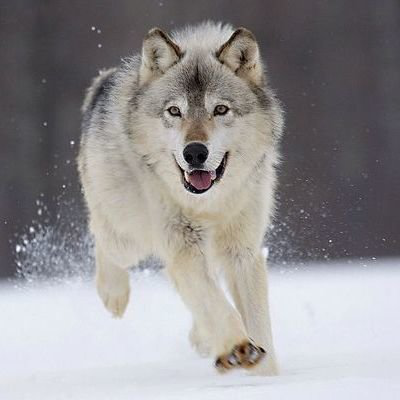

In [ ]:
image

In [ ]:
newsize = (224, 224)
image = image.resize(newsize)
# Shows the image in image viewer
image.show()

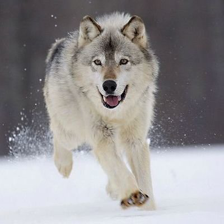

In [ ]:
image

Image size:  (224, 224)


(3, 224, 224)

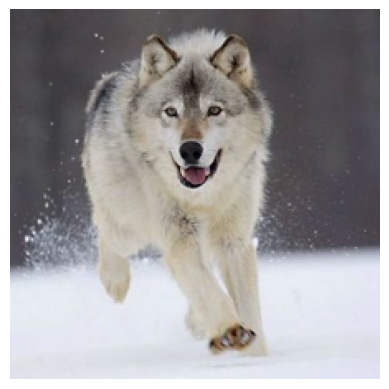

In [ ]:
labels = load_labels('imagenet-simple-labels.json')

print("Image size: ", image.size)
plt.axis('off')
display_image = plt.imshow(image)
image_data = np.array(image).transpose(2, 0, 1)
image_data.shape

In [ ]:
input_data = preprocess(image_data)

In [ ]:
input_data.shape

(1, 3, 224, 224)

In [ ]:
start = time.time()
raw_result = session.run([], {input_name: input_data})
end = time.time()
res = postprocess(raw_result)

Final top prediction is: grey wolf
Inference time: 14.84 ms
============ Top 5 labels are: ============================
['grey wolf' 'husky' 'Alaskan tundra wolf' 'Siberian Husky'
 'Alaskan Malamute']


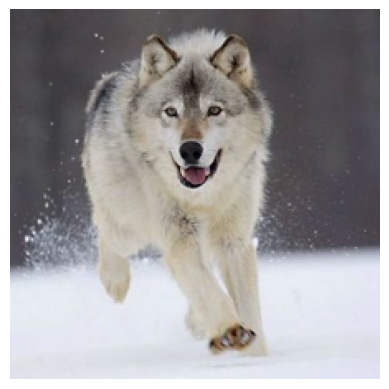

In [ ]:
inference_time = np.round((end - start) * 1000, 2)
idx = np.argmax(res)

print('========================================')
print('Final top prediction is: ' + labels[idx])
print('========================================')

print('========================================')
print('Inference time: ' + str(inference_time) + " ms")
print('========================================')

sort_idx = np.flip(np.squeeze(np.argsort(res)))
print('============ Top 5 labels are: ============================')
print(labels[sort_idx[:5]])
print('===========================================================')

plt.axis('off')
display_image = plt.imshow(image)

### Torchvision to ONNX

In [ ]:
from torchvision import models
resnet50 = models.resnet50(pretrained=True)
# Export the model to ONNX
image_height = 224
image_width = 224
x = torch.randn(1, 3, image_height, image_width, requires_grad=True)
torch_out = resnet50(x)
torch.onnx.export(resnet50,                     # model being run
                  x,                            # model input (or a tuple for multiple inputs)
                  "resnet50.onnx",              # where to save the model (can be a file or file-like object)
                  export_params=True,           # store the trained parameter weights inside the model file
                  opset_version=12,             # the ONNX version to export the model to
                  do_constant_folding=True,     # whether to execute constant folding for optimization
                  input_names = ['input'],      # the model's input names
                  output_names = ['output'])    # the model's output names

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 52.3MB/s]


In [ ]:
!ls

imagenet-simple-labels.json  resnet50.onnx  resnet50v2	resnet50v2.tar.gz  sample_data


In [ ]:
import onnx
onnx_model = onnx.load("resnet50.onnx")

In [ ]:
onnx.checker.check_model(onnx_model)

In [ ]:
traced_model=torch.jit.trace(resnet50, torch.rand(8,3,224,224))

In [ ]:
traced_output=traced_model(torch.rand(8,3,224,224))
traced_output.shape

torch.Size([8, 1000])

In [ ]:
!curl -o imagenet_classes.txt https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10472  100 10472    0     0  47341      0 --:--:-- --:--:-- --:--:-- 47384


In [ ]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

In [ ]:
categories

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

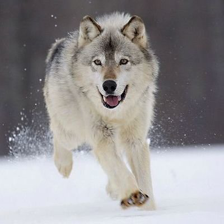

In [ ]:
image

In [ ]:
from torchvision import models, datasets, transforms as T
import torch
from PIL import Image
import numpy as np

# Pre-processing for ResNet-50 Inferencing, from https://pytorch.org/hub/pytorch_vision_resnet/
resnet50.eval()
#filename = 'cat.jpg' # change to your filename

input_image = image #Image.open(filename)
preprocess = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
print("GPU Availability: ", torch.cuda.is_available())
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    resnet50.to('cuda')

GPU Availability:  True


In [ ]:
# Inference with ONNX Runtime
import onnxruntime
from onnx import numpy_helper
import time

session_fp32 = onnxruntime.InferenceSession("resnet50.onnx", providers=['CPUExecutionProvider'])
# session_fp32 = onnxruntime.InferenceSession("resnet50.onnx", providers=['CUDAExecutionProvider'])
# session_fp32 = onnxruntime.InferenceSession("resnet50.onnx", providers=['OpenVINOExecutionProvider'])

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def run_sample(session, categories, inputs):
    latency = []
    start = time.time()
    input_arr = inputs.cpu().detach().numpy()
    ort_outputs = session.run([], {'input':input_arr})[0]
    latency.append(time.time() - start)
    output = ort_outputs.flatten()
    output = softmax(output) # this is optional
    top5_catid = np.argsort(-output)[:5]
    for catid in top5_catid:
        print(categories[catid], output[catid])
    return ort_outputs, latency

ort_output, latency = run_sample(session_fp32, categories, input_batch)
print("ONNX Runtime CPU/GPU/OpenVINO Inference time = {} ms".format(format(sum(latency) * 1000 / len(latency), '.2f')))


timber wolf 0.34165663
Eskimo dog 0.2342135
white wolf 0.19694373
Siberian husky 0.083100505
dogsled 0.02762879
ONNX Runtime CPU/GPU/OpenVINO Inference time = 14.01 ms


In [ ]:
session_cuda = onnxruntime.InferenceSession("resnet50.onnx", providers=['CUDAExecutionProvider'])
ort_output, latency= run_sample(session_cuda, categories, input_batch)
print("ONNX Runtime CPU/GPU/OpenVINO Inference time = {} ms".format(format(sum(latency) * 1000 / len(latency), '.2f')))


timber wolf 0.34165663
Eskimo dog 0.2342135
white wolf 0.19694373
Siberian husky 0.083100505
dogsled 0.02762879
ONNX Runtime CPU/GPU/OpenVINO Inference time = 10.15 ms


### Timm to ONNX

To enable exporting a timm model in ONNX format, we can use the `exportable` argument when creating the model, to ensure that the model is traceable.

In [ ]:
import timm
model = timm.create_model('resnet50d', pretrained=True, exportable=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/103M [00:00<?, ?B/s]

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

We can now use `torch.onnx.export` to trace and export our model:

In [ ]:
x = torch.randn(2, 3, 224, 224, requires_grad=True)
torch_out = model(x)

# Export the model
torch.onnx.export(model,                                       # model being run
                  x,                                           # model input (or a tuple for multiple inputs)
                  "resnet50d.onnx",                            # where to save the model (can be a file or file-like object)
                  export_params=True,                          # store the trained parameter weights inside the model file
                  opset_version=10,                            # the ONNX version to export the model to
                  do_constant_folding=True,                    # whether to execute constant folding for optimization
                  input_names = ['input'],                     # the model's input names
                  output_names = ['output'],                   # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},  # variable length axes
                                'output': {0 : 'batch_size'}})

We can now verify that our model is valid using the `check_model` function.

In [ ]:
import onnx

onnx_model = onnx.load("resnet50d.onnx")
onnx.checker.check_model(onnx_model)

As we specified that our model should be traceable, we could also have performed the tracing manually as demonstrated below.

In [ ]:
traced_model = torch.jit.trace(model, torch.rand(8, 3, 224, 224))

In [ ]:
type(traced_model)

torch.jit._trace.TopLevelTracedModule

In [ ]:
traced_model(torch.rand(8, 3, 224, 224)).shape

torch.Size([8, 1000])

###OpenVino

In [ ]:
!pip install openvino

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 35.5 MB/s eta 0:00:00


In [ ]:
input_batch.shape

torch.Size([1, 3, 224, 224])

In [ ]:
#Inference with OpenVINO
from openvino.runtime import Core

ie = Core()
onnx_model_path = "./resnet50.onnx"
model_onnx = ie.read_model(model=onnx_model_path)
compiled_model_onnx = ie.compile_model(model=model_onnx, device_name="CPU")

# inference
output_layer = next(iter(compiled_model_onnx.outputs))

latency = []
input_arr = input_batch.cpu().detach().numpy()
inputs = {'input':input_arr}
start = time.time()
request = compiled_model_onnx.create_infer_request()
output = request.infer(inputs=inputs)

outputs = request.get_output_tensor(output_layer.index).data
latency.append(time.time() - start)

print("OpenVINO CPU Inference time = {} ms".format(format(sum(latency) * 1000 / len(latency), '.2f')))

print("***** Verifying correctness *****")
for i in range(2):
    print('OpenVINO and ONNX Runtime output {} are close:'.format(i), np.allclose(ort_output, outputs, rtol=1e-05, atol=1e-04))

OpenVINO CPU Inference time = 18.16 ms
***** Verifying correctness *****
OpenVINO and ONNX Runtime output 0 are close: True
OpenVINO and ONNX Runtime output 1 are close: True
